In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, Flatten, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [0]:
X = [[[(2*i)+j] for i in range (5)] for j in range(100)]
print (X)
Y = [(10+(2*i)) for i in range(100)]
print (Y)

[[[0], [2], [4], [6], [8]], [[1], [3], [5], [7], [9]], [[2], [4], [6], [8], [10]], [[3], [5], [7], [9], [11]], [[4], [6], [8], [10], [12]], [[5], [7], [9], [11], [13]], [[6], [8], [10], [12], [14]], [[7], [9], [11], [13], [15]], [[8], [10], [12], [14], [16]], [[9], [11], [13], [15], [17]], [[10], [12], [14], [16], [18]], [[11], [13], [15], [17], [19]], [[12], [14], [16], [18], [20]], [[13], [15], [17], [19], [21]], [[14], [16], [18], [20], [22]], [[15], [17], [19], [21], [23]], [[16], [18], [20], [22], [24]], [[17], [19], [21], [23], [25]], [[18], [20], [22], [24], [26]], [[19], [21], [23], [25], [27]], [[20], [22], [24], [26], [28]], [[21], [23], [25], [27], [29]], [[22], [24], [26], [28], [30]], [[23], [25], [27], [29], [31]], [[24], [26], [28], [30], [32]], [[25], [27], [29], [31], [33]], [[26], [28], [30], [32], [34]], [[27], [29], [31], [33], [35]], [[28], [30], [32], [34], [36]], [[29], [31], [33], [35], [37]], [[30], [32], [34], [36], [38]], [[31], [33], [35], [37], [39]], [[32]

In [0]:
X = np.array(X, dtype="float32")
Y = np.array(Y, dtype="float32")

In [0]:
X /= 500
Y /= 500

In [0]:
X.shape

(100, 5, 1)

In [0]:
Y.shape

(100,)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, 
                                                random_state=5)

In [0]:
X_train

array([[[0.188],
        [0.192],
        [0.196],
        [0.2  ],
        [0.204]],

       [[0.112],
        [0.116],
        [0.12 ],
        [0.124],
        [0.128]],

       [[0.044],
        [0.048],
        [0.052],
        [0.056],
        [0.06 ]],

       [[0.078],
        [0.082],
        [0.086],
        [0.09 ],
        [0.094]],

       [[0.048],
        [0.052],
        [0.056],
        [0.06 ],
        [0.064]],

       [[0.026],
        [0.03 ],
        [0.034],
        [0.038],
        [0.042]],

       [[0.126],
        [0.13 ],
        [0.134],
        [0.138],
        [0.142]],

       [[0.142],
        [0.146],
        [0.15 ],
        [0.154],
        [0.158]],

       [[0.11 ],
        [0.114],
        [0.118],
        [0.122],
        [0.126]],

       [[0.174],
        [0.178],
        [0.182],
        [0.186],
        [0.19 ]],

       [[0.012],
        [0.016],
        [0.02 ],
        [0.024],
        [0.028]],

       [[0.176],
        [0.18 ],
        [

In [0]:
from keras.layers import SimpleRNN,LSTM
model = Sequential()
model.add(LSTM((2),input_shape=(5,1),return_sequences=True))
model.add(LSTM((3),input_shape=(5,1),return_sequences=True))
model.add(Flatten())
model.add(Dense(1,activation='relu'))
#model.compile(optimizer='adam',loss='mae',metrics=['acc'])
model.compile(optimizer='adam',loss='mae',metrics=['acc'])

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 5, 2)              32        
_________________________________________________________________
lstm_6 (LSTM)                (None, 5, 3)              72        
_________________________________________________________________
flatten_2 (Flatten)          (None, 15)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 16        
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [0]:
hist = model.fit(X_train, y_train, epochs=1000, batch_size=64, validation_data=(X_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 80 samples, validate on 20 samples
Epoch 1/1000





80/80 [==============================] - 2s 25ms/step - loss: 0.2232 - acc: 0.0000e+00 - val_loss: 0.1897 - val_acc: 0.0000e+00
Epoch 2/1000
80/80 [==============================] - 0s 289us/step - loss: 0.2194 - acc: 0.0000e+00 - val_loss: 0.1860 - val_acc: 0.0000e+00
Epoch 3/1000
80/80 [==============================] - 0s 338us/step - loss: 0.2157 - acc: 0.0000e+00 - val_loss: 0.1822 - val_acc: 0.0000e+00
Epoch 4/1000
80/80 [==============================] - 0s 276us/step - loss: 0.2119 - acc: 0.0000e+00 - val_loss: 0.1785 - val_acc: 0.0000e+00
Epoch 5/1000
80/80 [==============================] - 0s 272us/step - loss: 0.2081 - acc: 0.0000e+00 - val_loss: 0.1747 - val_acc: 0.0000e+00
Epoch 6/1000
80/80 [==============================] - 0s 262us/step - loss: 0.2043 - acc: 0.0000e+00 - val_loss: 0.1709 - val_acc: 0.0000e+00
Epo

In [0]:
y_predict = model.predict(X_test)

In [0]:
np.round(y_predict*500)

array([[143.],
       [ 74.],
       [102.],
       [ 66.],
       [159.],
       [ 56.],
       [ 30.],
       [ 50.],
       [ 44.],
       [ 80.],
       [204.],
       [ 84.],
       [151.],
       [ 90.],
       [131.],
       [ 78.],
       [ 94.],
       [125.],
       [ 34.],
       [149.]], dtype=float32)

In [0]:
np.round(y_test*500)

array([142.,  74., 102.,  66., 158.,  56.,  30.,  50.,  44.,  80., 204.,
        84., 150.,  90., 130.,  78.,  94., 124.,  34., 148.],
      dtype=float32)

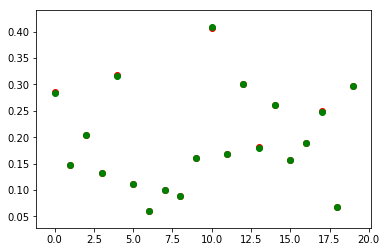

In [0]:
plt.scatter(range(20),y_predict,c = 'r')
plt.scatter(range(20),y_test ,c='g')
plt.show()

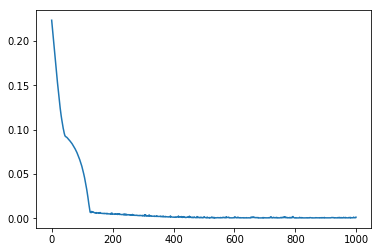

In [0]:
plt.plot(hist.history['loss'])
plt.show()